In [179]:
import json
import os
import torch
from NetworkAnalysis.Create_heterogeneous_graph import Create_heterogeneous_graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore mutation metapath

In [219]:
# Load configuration from the JSON file
with open('config/parameters.json', 'r') as config_file:
    config = json.load(config_file)

# Extract parameters with new structure
settings = config["settings"]
graph_params = config["graph_parameters"]
model_params = config["model_parameters"]
training_params = config["training_parameters"]

In [181]:
#read in (or create) heterodata_object
try:
    filepath = os.path.join(
        graph_params["base_path"],
        'multigraphs',
        f'heteroData_gene_cell_'
        f'{graph_params["cancer_type"].replace(" ", "_") if graph_params["cancer_type"] else "All"}_'
        f'{graph_params["gene_feat_name"]}_{graph_params["cell_feat_name"]}_'
        f'{"META2" if graph_params["metapaths"] else ""}.pt'
    )
    heterodata_obj = torch.load(filepath)
    print(f"Loaded heterodata object from {filepath}")

except Exception as e:
    print(f"No file found, creating new one: {e}")
    graph_creator = Create_heterogeneous_graph(
        BASE_PATH=graph_params["base_path"],
        cancer_type=graph_params["cancer_type"],
        cell_feature=graph_params["cell_feat_name"],
        gene_feature=graph_params["gene_feat_name"],
        metapaths=graph_params["metapaths"]
    )
    heterodata_obj = graph_creator.run_pipeline()
    
print(heterodata_obj)

Loaded heterodata object from ./Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_cnv_META2.pt
HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[39],
    names=[39],
    x=[39, 1224],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 34804],
    edge_label=[34804],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 712],
    edge_attr=[712],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 34804],
    edge_label=[34804],
  },
  (gene, rev_has_mutation_in, cell)={
    edge_index=[2, 712],
    edge_attr=[712],
  },
  (cell, metapath_0, cell)={
    edge_index=[2, 279],
    edge_weight=[279],
  }
)


In [218]:
print(heterodata_obj['cell', 'metapath_0', 'cell'].edge_weight)

tensor([ 8.,  1.,  9.,  8., 42.,  1.,  1.,  1.,  7.,  8.,  1.,  1., 10.,  1.,
         1.,  1., 12.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1., 12.,  1., 10.,  1.,  1., 12.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  8.,  1.,  2.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,
         1., 14.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1., 14.,  1.,
         1.,  1., 44.,  1.,  1.,  7., 12.,  1.,  1., 16.,  1.,  6.,  1.,  1.,
         1.,  1., 19.,  1.,  1.,  1., 13.,  1.,  1.,  1.,  1., 43.,  1.,  1.,
         1., 23.,  1.,  1.,  1.,  2.,  1., 19.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 27.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        38.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1., 20.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 15.,  

In [201]:
# check if all cells have mutation edges

for cell in heterodata_obj['cell'].node_id:
    if cell not in heterodata_obj['cell', 'has_mutation_in', 'gene'].edge_index[0]:
        print(f"Cell {cell} does not have a mutation edge")

# check if every cell is connected to all cells
meta = heterodata_obj['cell', 'metapath_0', 'cell'].edge_index
print(meta)

print(meta.shape)
sum=0
for i in range(1,39):
    sum+=i
print(sum)


tensor([[ 0,  0,  1,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  5,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  8,  9,  9,  9,  9,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 15,
         15, 15, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 20, 20,
         20, 20, 20, 20, 20, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
         22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
         23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27,
         27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 30, 31, 31, 31, 31,
         31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33,

# Network connectivity

In [43]:
cells = heterodata_obj['cell'].node_id
genes = heterodata_obj['gene'].node_id

dependency_edges = heterodata_obj['gene', 'dependency_of', 'cell'].edge_index


print(cells)
print(genes)
print(dependency_edges)
print(dependency_edges.shape)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38])
tensor([    0,     1,     2,  ..., 13395, 13396, 13397])
tensor([[ 5390,  1537, 10156,  ...,  1487,  2552,  5841],
        [    0,     0,     0,  ...,    38,    38,    38]])
torch.Size([2, 34804])


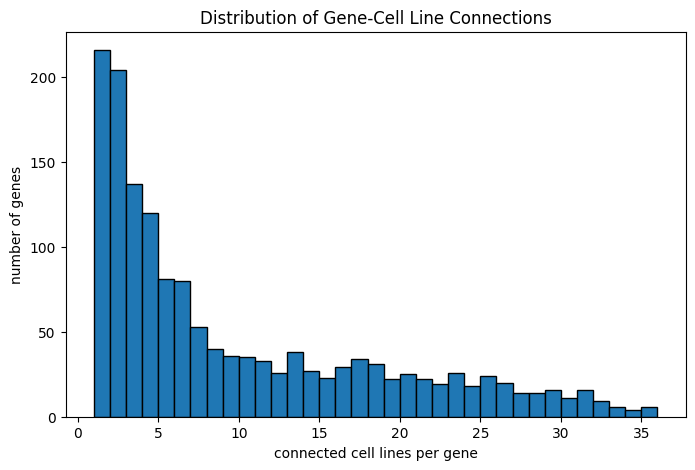

In [202]:
# Extract edge index and edge labels
dependency_edges = heterodata_obj['gene', 'dependency_of', 'cell'].edge_index
edge_labels = heterodata_obj['gene', 'dependency_of', 'cell'].edge_label

# Filter edges where edge_label == 1
mask = edge_labels == 1
filtered_edges = dependency_edges[:, mask]  # Apply mask to get only relevant edges

# Count the number of cell lines each gene connects to (only for filtered edges)
gene_connections = torch.bincount(filtered_edges[0], minlength=len(genes))

# Convert to a list for plotting
gene_connections_list = gene_connections.tolist()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(gene_connections_list, bins=range(1, max(gene_connections_list) + 1), edgecolor='black')
plt.xlabel("connected cell lines per gene")
plt.ylabel("number of genes")
plt.title("Distribution of Gene-Cell Line Connections")
plt.show()



Most genes in the have only one dependency, a few genes have a lot of dependencies.

tensor([1., 0., 0.,  ..., 1., 0., 1.])


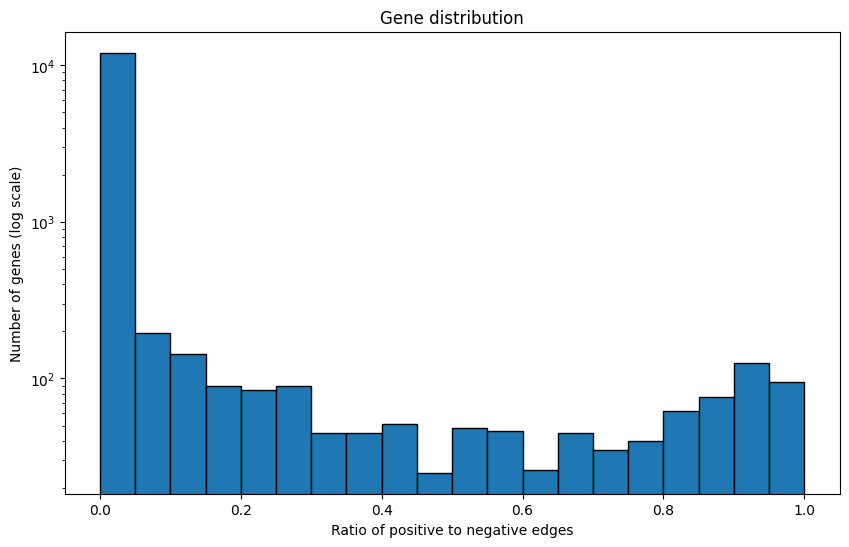

[0, 0, 0, 0.03125, 0, 0, 0, 0, 0, 0.5217391304347826, 0, 0.23809523809523808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.17647058823529413, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.26666666666666666, 0, 0, 0, 0, 0.1111111111111111, 0, 0, 0.11764705882352941, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4444444444444444, 0, 0, 0, 0.92, 0, 0, 0, 0, 0.18181818181818182, 0, 0.9375, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08823529411764706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9354838709677419, 0, 0.9696969696969697, 0.29411764705882354, 0, 0, 0, 0.8888888888888888, 0.5789473684210527, 0, 0, 0, 0, 0, 0.05714285714285714, 0, 0, 0, 0, 0, 0.058823529411764705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.42857142857142855, 0, 0, 0.14814814814814814, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [213]:
# Extract edge index and edge labels
dependency_edges = heterodata_obj['gene', 'dependency_of', 'cell'].edge_index
edge_labels = heterodata_obj['gene', 'dependency_of', 'cell'].edge_label
print(edge_labels)

# per gene, calculate the ratio of positive to negative edges
ratios = []

# Iterate over genes
for gene in range(len(genes)):  
    # Find edges related to this gene (dependency_edges[0] contains gene indices)
    gene_mask = dependency_edges[0] == gene
    
    # Select positive and negative edges for this gene
    positive_edges = edge_labels[gene_mask] == 1
    negative_edges = edge_labels[gene_mask] == 0

    # Compute ratio, avoiding division by zero
    if positive_edges.sum() == 0:
        ratio = 0  # No positive edges for this gene
    else:
        ratio = positive_edges.sum().item() / (positive_edges.sum().item() + negative_edges.sum().item())

    ratios.append(ratio)

# Plot histogram of ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=20, edgecolor='black')
plt.xlabel("Ratio of positive to negative edges")
plt.ylabel("Number of genes (log scale)")
plt.yscale("log")
plt.title("Gene distribution")
plt.show()

print(ratios)


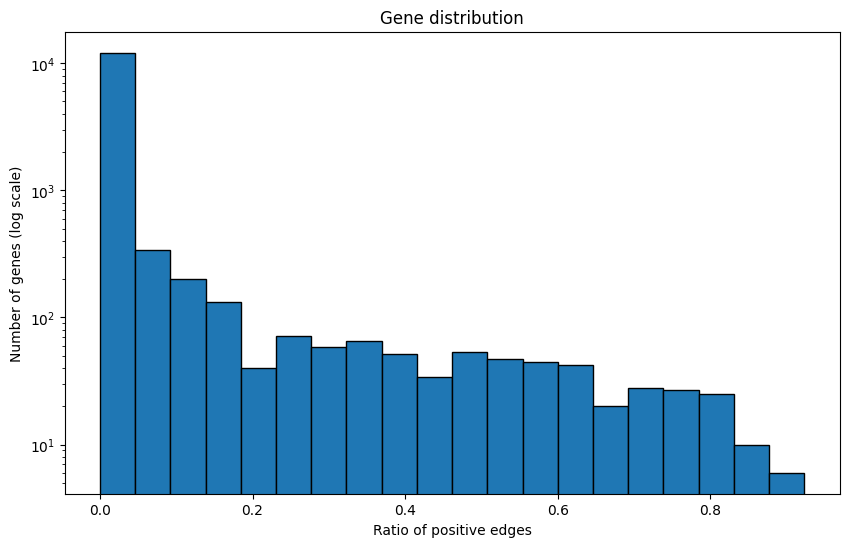

13398


In [217]:

ratios = []

# Iterate over genes
for gene in range(len(genes)):  
    # Find edges related to this gene (dependency_edges[0] contains gene indices)
    gene_mask = dependency_edges[0] == gene
    
    # Select positive and negative edges for this gene
    positive_edges = edge_labels[gene_mask] == 1
    negative_edges = edge_labels[gene_mask] == 0

    # Compute ratio, avoiding division by zero
    if positive_edges.sum() == 0:
        ratio = 0  # No positive edges for this gene
    else:
        ratio = positive_edges.sum().item() / 39 

    ratios.append(ratio)

# Plot histogram of ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=20, edgecolor='black')
plt.xlabel("Ratio of positive edges")
plt.ylabel("Number of genes (log scale)")
plt.yscale("log")
plt.title("Gene distribution")
plt.show()

print(len(ratios))

Most genes have no positive edges, only a few genes are connected to (almost) all cell lines.

# Model results

These are the predictions of the model along with some of the gene and cell line embeddings after training.

In [130]:
pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_cgp_cnv_37.csv').head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13388,13389,13390,13391,13392,13393,13394,13395,13396,13397
0,0,0.257692,0.035624,0.107672,0.064083,0.680379,0.838171,0.363344,0.027756,0.916624,...,0.317482,0.029861,0.374043,0.159192,0.054935,0.1767,0.064712,0.286873,0.526098,0.003335
1,1,0.257692,0.035624,0.107672,0.064083,0.680379,0.838171,0.363344,0.027756,0.916624,...,0.317482,0.029861,0.374043,0.159192,0.054935,0.1767,0.064712,0.286873,0.526098,0.003335
2,2,0.257692,0.035624,0.107672,0.064083,0.680379,0.838171,0.363344,0.027756,0.916624,...,0.317482,0.029861,0.374043,0.159192,0.054935,0.1767,0.064712,0.286873,0.526098,0.003335
3,3,0.257692,0.035624,0.107672,0.064083,0.680379,0.838171,0.363344,0.027756,0.916624,...,0.317482,0.029861,0.374043,0.159192,0.054935,0.1767,0.064712,0.286873,0.526098,0.003335
4,4,0.257692,0.035624,0.107672,0.064083,0.680379,0.838171,0.363344,0.027756,0.916624,...,0.317482,0.029861,0.374043,0.159192,0.054935,0.1767,0.064712,0.286873,0.526098,0.003335


In [129]:
pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_C4_cnv_37.csv').head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692
0,0,0.39575,0.001125,0.063709,0.362451,0.586884,0.092273,0.42177,0.508179,0.350577,...,0.277051,0.624955,0.302577,0.236101,0.154941,0.379239,0.438935,0.114527,0.393916,0.067929
1,1,0.39575,0.001125,0.063709,0.362451,0.586884,0.092273,0.42177,0.508179,0.350577,...,0.277051,0.624955,0.302577,0.236101,0.154941,0.379239,0.438935,0.114527,0.393916,0.067929
2,2,0.39575,0.001125,0.063709,0.362451,0.586884,0.092273,0.42177,0.508179,0.350577,...,0.277051,0.624955,0.302577,0.236101,0.154941,0.379239,0.438935,0.114527,0.393916,0.067929
3,3,0.39575,0.001125,0.063709,0.362451,0.586884,0.092273,0.42177,0.508179,0.350577,...,0.277051,0.624955,0.302577,0.236101,0.154941,0.379239,0.438935,0.114527,0.393916,0.067929
4,4,0.39575,0.001125,0.063709,0.362451,0.586884,0.092273,0.42177,0.508179,0.350577,...,0.277051,0.624955,0.302577,0.236101,0.154941,0.379239,0.438935,0.114527,0.393916,0.067929


In [120]:
pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_cgp_expression_marker_genes_hvg_37.csv').head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13388,13389,13390,13391,13392,13393,13394,13395,13396,13397
0,0,0.000327,0.004168,0.047991,0.006082,0.077532,0.121368,0.238847,0.000371,0.742955,...,0.819687,0.005964,0.235051,0.182183,0.31292,0.188209,0.190562,0.185801,0.232147,0.000346
1,1,0.000327,0.004168,0.047991,0.006082,0.077532,0.121368,0.238847,0.000371,0.742955,...,0.819687,0.005964,0.235051,0.182183,0.31292,0.188209,0.190562,0.185801,0.232147,0.000346
2,2,0.000327,0.004168,0.047991,0.006082,0.077532,0.121368,0.238847,0.000371,0.742955,...,0.819687,0.005964,0.235051,0.182183,0.31292,0.188209,0.190562,0.185801,0.232147,0.000346
3,3,0.000327,0.004168,0.047991,0.006082,0.077532,0.121368,0.238847,0.000371,0.742955,...,0.819687,0.005964,0.235051,0.182183,0.31292,0.188209,0.190562,0.185801,0.232147,0.000346
4,4,0.000327,0.004168,0.047991,0.006082,0.077532,0.121368,0.238847,0.000371,0.742955,...,0.819687,0.005964,0.235051,0.182183,0.31292,0.188209,0.190562,0.185801,0.232147,0.000346


In [124]:
df = pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_cgp_MOSA_37.csv')
variances = df.var()
means = df.mean()


print(variances[variances >0.00000000000001])

Unnamed: 0    58.5
dtype: float64


In [127]:
print(means[means >0.5])

Unnamed: 0    12.500000
9              0.627482
12             0.990243
14             0.920122
26             0.593069
                ...    
13374          0.815477
13385          0.507040
13386          0.918844
13388          0.740597
13393          0.575263
Length: 3515, dtype: float64


In [128]:
#Cell embeddings
pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_cell_embs_cgp_expression_marker_genes_hvg_37.csv').head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,ACH-000078,-0.010402,0.011855,-0.031081,0.020835,0.002055,-0.02438,-0.001304,-0.005439,-0.00388,...,0.017103,-0.009247,0.023666,-0.126762,-0.014102,0.047448,0.026837,-0.001358,0.053826,-0.134249
1,ACH-000099,-0.010402,0.011855,-0.031081,0.020835,0.002055,-0.02438,-0.001304,-0.005439,-0.00388,...,0.017103,-0.009247,0.023666,-0.126762,-0.014102,0.047448,0.026837,-0.001358,0.053826,-0.134249
2,ACH-000120,-0.010402,0.011855,-0.031081,0.020835,0.002055,-0.02438,-0.001304,-0.005439,-0.00388,...,0.017103,-0.009247,0.023666,-0.126762,-0.014102,0.047448,0.026837,-0.001358,0.053826,-0.134249
3,ACH-000149,-0.010402,0.011855,-0.031081,0.020835,0.002055,-0.02438,-0.001304,-0.005439,-0.00388,...,0.017103,-0.009247,0.023666,-0.126762,-0.014102,0.047448,0.026837,-0.001358,0.053826,-0.134249
4,ACH-000203,-0.010402,0.011855,-0.031081,0.020835,0.002055,-0.02438,-0.001304,-0.005439,-0.00388,...,0.017103,-0.009247,0.023666,-0.126762,-0.014102,0.047448,0.026837,-0.001358,0.053826,-0.134249


In [114]:
# gene embeddings
pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_gene_embs_cgp_MOSA_37.csv')

pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_gene_embs_cgp_cnv_37.csv')


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,A1CF,0.485844,-0.318522,-0.263530,-0.137918,0.034328,0.006664,-0.401885,0.427014,0.203478,...,-0.098875,-0.226290,0.079726,1.203462,-0.119788,-0.263916,2.415054,-0.434435,0.478704,-0.228431
1,A2M,0.701537,-0.837488,0.013397,1.303723,-0.250572,-1.146841,1.965818,3.136687,1.301580,...,-1.473786,0.630680,1.279987,4.060145,1.153481,-0.249272,11.197934,-0.009028,4.203407,1.440806
2,A4GNT,0.700111,-0.325001,-0.216834,-0.629390,0.531309,-0.385346,0.235667,0.177930,-0.170782,...,0.297032,-0.169609,0.501984,1.984271,0.206031,-0.308236,4.438350,-0.106080,0.531084,0.170317
3,AAAS,5.028561,-0.159120,0.584404,0.441903,0.877098,-1.546507,-0.298925,2.084575,-0.356281,...,1.792563,1.254899,0.798559,1.713072,0.382004,-0.230078,11.503115,-0.809384,3.026706,1.500255
4,AADAT,-0.226024,-0.030022,0.415144,-0.310287,-0.604871,0.014207,-0.502592,0.507302,0.291287,...,-0.238487,-0.060765,0.308654,-0.355339,0.579639,0.244086,-0.558508,-0.105951,-0.446402,-0.198469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13393,ZXDA,0.544899,-0.019075,-0.393252,-0.256110,0.447110,-0.320703,0.197316,0.281801,0.122963,...,0.095241,0.013676,0.140992,1.109571,0.117045,-0.289555,3.840524,0.339795,0.328053,0.055132
13394,ZXDB,1.426547,-0.098456,-0.267841,-1.111460,0.586284,-0.238887,0.566862,0.252001,-0.238077,...,0.222118,-0.029304,0.428312,2.524500,0.267892,-0.306262,5.770296,0.463597,0.581795,0.161018
13395,ZXDC,0.012301,0.047913,-0.398359,0.077329,0.364067,-0.415924,0.110451,0.207496,0.131707,...,-0.040932,0.099248,-0.079774,0.337535,0.020413,-0.244040,2.702617,0.319048,-0.087320,0.019519
13396,ZYX,-0.187934,0.084589,1.267678,-0.463705,0.466790,-0.302879,0.063552,1.072690,0.533155,...,1.596982,0.110745,2.637436,1.090171,0.775143,1.254204,-0.371944,2.009218,-1.227850,0.251893


### Conclusion

- All cell lines have the same embeddings after training.
- All genes have different embeddings after training.
- The model predicts the same dependency value accross cell lines. This makes sense, because the model's preiction is the dot product of the gene embedding and the cell embedding. If cell embeddings are the same for all cells, so will be the predictions! The model learns how important a gene is in general, but not wether it's important for particular cell lines. 


This has been tested for all different cell features.


### Visualizing predictions

In [214]:
### Visualizing predictions

results = df.iloc[0, :].sort_values(ascending=True)

results = results

print(results.head())

print(results.shape)


Unnamed: 0    0.000000e+00
3537          4.854853e-07
5082          1.995430e-06
2922          3.959011e-06
3479          4.945773e-06
Name: 0, dtype: float64
(13399,)


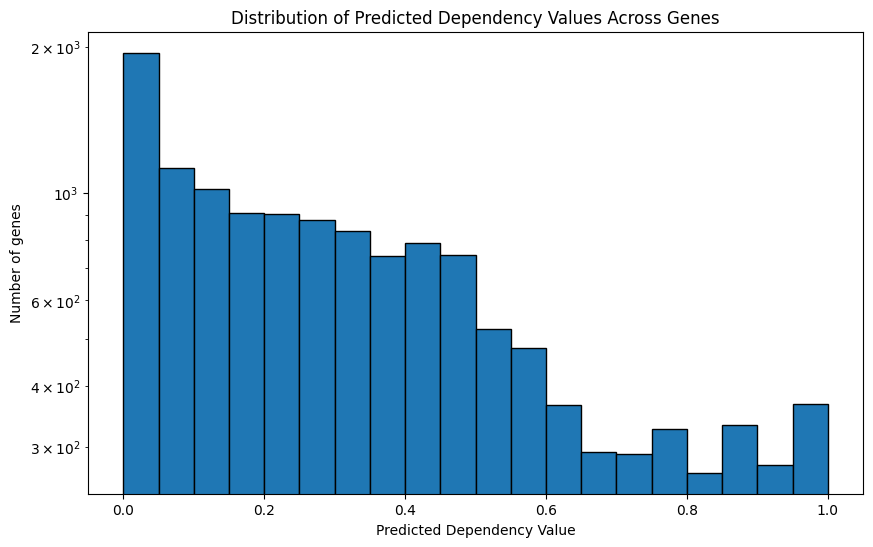

In [250]:
plt.figure(figsize=(10, 6))
plt.hist(results, bins=20, edgecolor='black')  # Adjust bins for granularity
plt.xlabel('Predicted Dependency Value')
plt.ylabel('Number of genes')
plt.title('Distribution of Predicted Dependency Values Across Genes')
plt.yscale("log")  # Optional: log scale if values are highly skewed
plt.show()

Let's check how Jihwan's model is doing

In [147]:
df2 = pd.read_csv('./Data/NB_results/Neuroblastoma_crispr0_5_HetGNN_Model_Jihwan_cgp_cnv_Cell_embs_37.csv').head()

df = pd.read_csv('./Data/NB_results/Neuroblastoma_Reactome_crispr0_5_HetGNN_cgp_MOSA_37.csv')
variances = df.var()
means = df.mean()


print(variances[variances >0.00000000000001])
print(means[means >0.5])


Unnamed: 0    58.5
dtype: float64
Unnamed: 0    12.500000
9              0.627482
12             0.990243
14             0.920122
26             0.593069
                ...    
13374          0.815477
13385          0.507040
13386          0.918844
13388          0.740597
13393          0.575263
Length: 3515, dtype: float64


In [150]:
# cell embeddings
cell_embs = pd.read_csv('./Data/NB_results/Neuroblastoma_crispr0_5_HetGNN_Model_Jihwan_cgp_cnv_Cell_embs_37.csv').head()

# gene embeddings
gene_embs = pd.read_csv('./Data/NB_results/Neuroblastoma_crispr0_5_HetGNN_Model_Jihwan_cgp_cnv_Gene_embs_37.csv').head()

print(cell_embs.head())
print(gene_embs.head())




   Unnamed: 0         0         1         2         3         4         5  \
0  ACH-000078 -0.000184  0.000077 -0.000409 -0.002831 -0.005855  0.035406   
1  ACH-000099 -0.000184  0.000077 -0.000409 -0.002831 -0.005855  0.035406   
2  ACH-000120 -0.000184  0.000077 -0.000409 -0.002831 -0.005855  0.035406   
3  ACH-000149 -0.000184  0.000077 -0.000409 -0.002831 -0.005855  0.035406   
4  ACH-000203 -0.000184  0.000077 -0.000409 -0.002831 -0.005855  0.035406   

          6        7         8  ...       118       119       120      121  \
0  0.001911 -0.00183 -0.003694  ...  0.004802  0.000093 -0.000506 -0.00143   
1  0.001911 -0.00183 -0.003694  ...  0.004802  0.000093 -0.000506 -0.00143   
2  0.001911 -0.00183 -0.003694  ...  0.004802  0.000093 -0.000506 -0.00143   
3  0.001911 -0.00183 -0.003694  ...  0.004802  0.000093 -0.000506 -0.00143   
4  0.001911 -0.00183 -0.003694  ...  0.004802  0.000093 -0.000506 -0.00143   

        122       123       124       125       126       127  
0  0

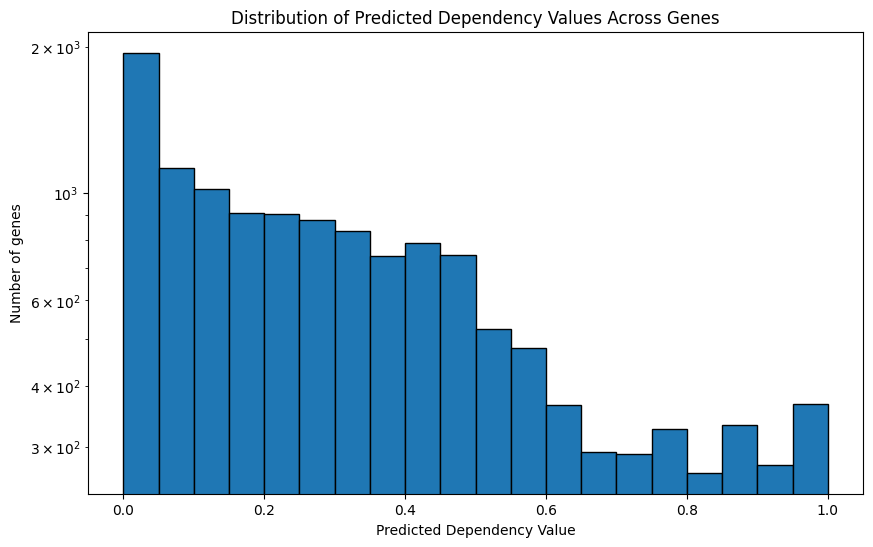

In [251]:
### Visualizing predictions

results = df.iloc[0, :].sort_values(ascending=True)

#plot the results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=20, edgecolor='black')  # Adjust bins for granularity
plt.xlabel('Predicted Dependency Value')
plt.ylabel('Number of genes')
plt.title('Distribution of Predicted Dependency Values Across Genes')
plt.yscale("log")  # Optional: log scale if values are highly skewed
plt.show()

## CHECK METAPATHS MUTATION

In [117]:
# Load configuration from the JSON file
with open('config/parameters.json', 'r') as config_file:
    config = json.load(config_file)

# Extract parameters with new structure
settings = config["settings"]
graph_params = config["graph_parameters"]
model_params = config["model_parameters"]
training_params = config["training_parameters"]

In [118]:
#read in (or create) heterodata_object
try:
    filepath = os.path.join(
        graph_params["base_path"],
        'multigraphs',
        f'heteroData_gene_cell_'
        f'{graph_params["cancer_type"].replace(" ", "_") if graph_params["cancer_type"] else "All"}_'
        f'{graph_params["gene_feat_name"]}_{graph_params["cell_feat_name"]}_'
        f'{"META2" if graph_params["metapaths"] else ""}.pt'
    )
    heterodata_obj = torch.load(filepath)
    print(f"Loaded heterodata object from {filepath}")

except Exception as e:
    print(f"No file found, creating new one: {e}")
    graph_creator = Create_heterogeneous_graph(
        BASE_PATH=graph_params["base_path"],
        cancer_type=graph_params["cancer_type"],
        cell_feature=graph_params["cell_feat_name"],
        gene_feature=graph_params["gene_feat_name"],
        metapaths=graph_params["metapaths"]
    )
    heterodata_obj = graph_creator.run_pipeline()
    
print(heterodata_obj)

Loaded heterodata object from ./Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_cnv_META2.pt
HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[39],
    names=[39],
    x=[39, 1224],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 34804],
    edge_label=[34804],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 712],
    edge_attr=[712],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 34804],
    edge_label=[34804],
  },
  (gene, rev_has_mutation_in, cell)={
    edge_index=[2, 712],
    edge_attr=[712],
  },
  (cell, metapath_0, cell)={
    edge_index=[2, 279],
    edge_weight=[279],
  }
)


In [119]:
# Count for every cell the number of metapaths

metapaths = heterodata_obj['cell', 'metapath_0', 'cell'].edge_index.numpy()

print(metapaths)
print(metapaths.shape)
List = []

for i in range(38):
    if i in metapaths:
        List.append(i)
    else:
        print(f"Cell {i} does not have a metapath")


print(set(List))



[[ 0  0  1  2  3  3  3  3  3  4  4  5  5  5  5  5  6  6  6  6  6  6  6  6
   6  6  6  6  6  7  7  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
   9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 12 12 12 12
  12 12 12 12 12 12 12 12 12 13 13 13 13 13 14 14 14 15 15 15 16 16 17 17
  17 17 17 18 18 18 18 18 19 19 20 20 20 20 20 20 20 21 21 22 22 22 22 22
  22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23 23 23
  23 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25
  25 25 25 25 25 25 25 25 26 26 26 27 27 27 27 27 27 27 27 28 28 28 28 29
  29 30 31 31 31 31 31 31 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33
  33 33 33 33 33 33 33 33 33 33 33 34 34 34 34 34 35 35 35 36 36 36 36 36
  36 36 36 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
  37 38 38 38 38 38 38 38 38 38 38 38 38 38 38]
 [ 0 38  1  2  3  5 10 11 15  4 13  3  5  9 27 28  6  9 10 12 22 23 24 25
  31 33 36 37 38  7 32  8  5  6  9 10 12 17 22 23 24 25 27 28 31

In [220]:
#read in (or create) heterodata_object
try:
    filepath = os.path.join(
        graph_params["base_path"],
        'multigraphs',
        f'heteroData_gene_cell_'
        f'{graph_params["cancer_type"].replace(" ", "_") if graph_params["cancer_type"] else "All"}_'
        f'{graph_params["gene_feat_name"]}_{graph_params["cell_feat_name"]}_'
        f'{"META2" if graph_params["metapaths"] else ""}.pt'
    )
    heterodata_obj = torch.load(filepath)
    print(f"Loaded heterodata object from {filepath}")

except Exception as e:
    print(f"No file found, creating new one: {e}")
    graph_creator = Create_heterogeneous_graph(
        BASE_PATH=graph_params["base_path"],
        cancer_type=graph_params["cancer_type"],
        cell_feature=graph_params["cell_feat_name"],
        gene_feature=graph_params["gene_feat_name"],
        metapaths=graph_params["metapaths"]
    )
    heterodata_obj = graph_creator.run_pipeline()
    
print(heterodata_obj)

Loaded heterodata object from ./Data/multigraphs/heteroData_gene_cell_All_cgp_expression_marker_genes_hvg_META2.pt
HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[1076],
    names=[1076],
    x=[1076, 1308],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 924728],
    edge_label=[924728],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 51878],
    edge_attr=[51878],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 924728],
    edge_label=[924728],
  },
  (gene, rev_has_mutation_in, cell)={
    edge_index=[2, 51878],
    edge_attr=[51878],
  },
  (cell, metapath_0, cell)={
    edge_index=[2, 602072],
    edge_weight=[602072],
  }
)


In [249]:
# count metapaths per cell line
import numpy as np
metapaths = heterodata_obj['cell', 'metapath_0', 'cell'].edge_index.numpy()


# Count occurrences of each cell node in the edge list
unique, counts = np.unique(metapaths.flatten(), return_counts=True)

# Convert to dictionary
metapath_edge_counts = dict(zip(unique, counts))
print(metapath_edge_counts)

# sort by counts
sorted_metapath_edge_counts = sorted(metapath_edge_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_metapath_edge_counts)

#len(sorted_metapath_edge_counts)


{0: 1384, 1: 1388, 2: 1388, 3: 332, 4: 1564, 5: 308, 6: 112, 7: 1412, 8: 518, 9: 1548, 10: 1444, 11: 1426, 12: 334, 13: 1564, 14: 1422, 15: 1430, 16: 1526, 17: 312, 18: 510, 19: 216, 20: 316, 21: 1504, 22: 1400, 23: 306, 24: 1476, 25: 128, 26: 1484, 27: 1372, 28: 1528, 29: 132, 30: 1406, 31: 1412, 32: 1396, 33: 146, 34: 1454, 35: 1514, 36: 1394, 37: 326, 38: 1498, 39: 396, 40: 1380, 41: 58, 42: 58, 43: 298, 44: 1510, 45: 226, 46: 1448, 47: 1400, 48: 172, 49: 60, 50: 1422, 51: 376, 52: 204, 53: 428, 54: 1520, 55: 76, 56: 1532, 57: 1466, 58: 1408, 59: 112, 60: 1500, 61: 242, 62: 126, 63: 1422, 64: 1422, 65: 1438, 66: 1378, 67: 74, 68: 206, 69: 510, 70: 1500, 71: 1494, 72: 1462, 73: 1434, 74: 1496, 75: 1406, 76: 116, 77: 1496, 78: 1404, 79: 1506, 80: 1422, 81: 1432, 82: 1388, 83: 1490, 84: 1390, 85: 300, 86: 222, 87: 1452, 88: 312, 89: 194, 90: 528, 91: 346, 92: 314, 93: 1428, 94: 1442, 95: 96, 96: 1396, 97: 1444, 98: 454, 99: 1504, 100: 1514, 101: 572, 102: 1464, 103: 428, 104: 1484, 105

In [244]:
# count gene-gene edges
gene_gene_edges = heterodata_obj['gene', 'interacts_with', 'gene'].edge_index.numpy()

# count occurrences of each gene node in the edge list
unique, counts = np.unique(gene_gene_edges.flatten(), return_counts=True)

# Convert to dictionary
gene_gene_edge_counts = dict(zip(unique, counts))

# sort by counts
sorted_gene_gene_edge_counts = sorted(gene_gene_edge_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_gene_gene_edge_counts)



[(3359, 1052), (9905, 1004), (12230, 961), (12241, 833), (12240, 821), (8953, 761), (4277, 758), (11116, 674), (5536, 608), (8954, 587), (10885, 587), (8955, 581), (128, 579), (4985, 574), (7320, 568), (2467, 560), (9340, 537), (4286, 513), (8502, 513), (11884, 512), (8738, 505), (8741, 503), (8747, 501), (8739, 500), (8746, 499), (6370, 485), (8498, 484), (7152, 482), (1727, 477), (8734, 475), (11005, 474), (7153, 472), (11118, 471), (8735, 455), (8736, 455), (8740, 455), (8743, 455), (8742, 453), (6377, 450), (8737, 449), (733, 447), (732, 441), (4437, 434), (4693, 433), (9549, 433), (11117, 426), (3965, 420), (4967, 417), (2355, 413), (7001, 413), (131, 401), (3850, 401), (4290, 401), (8636, 398), (4285, 395), (3196, 393), (4690, 393), (3253, 390), (3096, 388), (9641, 388), (1676, 387), (4625, 384), (8499, 381), (8602, 381), (5851, 380), (9511, 379), (9778, 374), (4927, 372), (5520, 368), (355, 366), (4268, 366), (4267, 365), (4524, 363), (4269, 360), (3087, 359), (9348, 357), (1783